# Coursework 1

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm

import scipy.stats as sps




# import sklearn
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sn

## 1. Data description and refining

In [9]:
df = pd.read_csv("coursework_1_data_2019.csv")
df.replace('\s+', '_',regex=True,inplace=True)
df.head()
df

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking_and_Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire_and_the_Humber,metropolitan_borough
3,Bath_and_North_East_Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South_West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East_of_England,unitary_authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,174733,209000,69000,47000,30000,41000,14000,8000,North_West,metropolitan_borough
148,Wokingham,119,146,169,160803,165785,166687,50,70,67,...,86210,109000,20000,41000,13000,19000,10000,6000,South_East,unitary_authority
149,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,140604,201000,18000,27000,23000,55000,50000,28000,West_Midlands,metropolitan_borough
150,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,...,317961,470000,128000,112000,57000,76000,67000,30000,West_Midlands,non_metropolitan_county


In [56]:
# Insert calculated columns refer to:
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html

In [10]:
# Calculate the rate of condition X
df["2008_X_rate"] = df["2008_cases_total"] / df["2008_pop_total"]
df["2013_X_rate"] = df["2013_cases_total"] / df["2013_pop_total"]
df["2018_X_rate"] = df["2018_cases_total"] / df["2018_pop_total"]
df["rate_diff"] = df["2018_X_rate"] - df["2008_X_rate"]
df = df.round(4)
# round the decimal places
# df = df.style.format({
#      '2008_X_ratio': '{:,.4f}'.format,
#      '2013_X_ratio': '{:,.4f}'.format,
#      '2018_X_ratio': '{:,.4f}'.format
#  })



# df.insert(7, "2008_X_ratio",df["2008_cases_total"] / df["2008_pop_total"])

df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_X_rate,2013_X_rate,2018_X_rate,rate_diff
0,Barking_and_Dagenham,593,619,763,172684,179030,181779,187,190,230,...,18000,41000,18000,19000,London,london_borough,0.0034,0.0035,0.0042,0.0008
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,23000,74000,30000,26000,London,london_borough,0.0016,0.0017,0.0022,0.0006
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,5000,26000,29000,14000,Yorkshire_and_the_Humber,metropolitan_borough,0.0016,0.0018,0.0020,0.0005
3,Bath_and_North_East_Somerset,456,421,494,178625,172975,189334,157,129,156,...,19000,50000,10000,7000,South_West,unitary_authority,0.0026,0.0024,0.0026,0.0001
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,17000,8000,3000,13000,East_of_England,unitary_authority,0.0020,0.0020,0.0022,0.0002


In [11]:
df_2 = df.drop(['local_authority_area', '2008_cases_male', '2013_cases_male', '2018_cases_male', 
                      '2008_pop_male', '2013_pop_male', '2018_pop_male', 
                      '2008_cases_female', '2013_cases_female', '2018_cases_female',
                      '2008_pop_female', '2013_pop_female', '2018_pop_female', '2013_X_rate'], axis = 1)

df_2

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_X_rate,2018_X_rate,rate_diff
0,593,619,763,172684,179030,181779,139000,21000,22000,18000,41000,18000,19000,London,london_borough,0.0034,0.0042,0.0008
1,539,594,773,340435,344062,355955,220000,50000,17000,23000,74000,30000,26000,London,london_borough,0.0016,0.0022,0.0006
2,360,451,527,226755,244010,257883,160000,41000,45000,5000,26000,29000,14000,Yorkshire_and_the_Humber,metropolitan_borough,0.0016,0.0020,0.0005
3,456,421,494,178625,172975,189334,161000,33000,42000,19000,50000,10000,7000,South_West,unitary_authority,0.0026,0.0026,0.0001
4,311,327,367,158185,164807,170463,130000,37000,52000,17000,8000,3000,13000,East_of_England,unitary_authority,0.0020,0.0022,0.0002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2560,2652,2987,310630,312142,342200,209000,69000,47000,30000,41000,14000,8000,North_West,metropolitan_borough,0.0082,0.0087,0.0005
148,119,146,169,160803,165785,166687,109000,20000,41000,13000,19000,10000,6000,South_East,unitary_authority,0.0007,0.0010,0.0003
149,1442,1571,1728,239744,252117,264037,201000,18000,27000,23000,55000,50000,28000,West_Midlands,metropolitan_borough,0.0060,0.0065,0.0005
150,2718,3061,3237,559135,605974,636832,470000,128000,112000,57000,76000,67000,30000,West_Midlands,non_metropolitan_county,0.0049,0.0051,0.0002


## 2. Encoding of categorical variables and rearranging

In [12]:
# Select subset of a DataFrame
# https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html
df_2 = df[['rate_diff', '2008_X_rate', '2018_X_rate', 'total_budget',
           'clean_air', 'clean_environ', 'health_training',
           'school_awareness', 'media_awareness', 'sub_counselling',
           'region', 'local_authority_type']]

df_2

,rate_diff,2008_X_rate,2018_X_rate,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,0.0008,0.0034,0.0042,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,0.0006,0.0016,0.0022,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,0.0005,0.0016,0.0020,160000,41000,45000,5000,26000,29000,14000,Yorkshire_and_the_Humber,metropolitan_borough
3,0.0001,0.0026,0.0026,161000,33000,42000,19000,50000,10000,7000,South_West,unitary_authority
4,0.0002,0.0020,0.0022,130000,37000,52000,17000,8000,3000,13000,East_of_England,unitary_authority
...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0005,0.0082,0.0087,209000,69000,47000,30000,41000,14000,8000,North_West,metropolitan_borough
148,0.0003,0.0007,0.0010,109000,20000,41000,13000,19000,10000,6000,South_East,unitary_authority
149,0.0005,0.0060,0.0065,201000,18000,27000,23000,55000,50000,28000,West_Midlands,metropolitan_borough
150,0.0002,0.0049,0.0051,470000,128000,112000,57000,76000,67000,30000,West_Midlands,non_metropolitan_county


In [13]:
df_numeric = pd.get_dummies(df_2)
df_numeric

,rate_diff,2008_X_rate,2018_X_rate,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,...,region_North_West,region_South_East,region_South_West,region_West_Midlands,region_Yorkshire_and_the_Humber,local_authority_type_london_borough,local_authority_type_metropolitan_borough,local_authority_type_non_metropolitan_county,local_authority_type_other_london,local_authority_type_unitary_authority
0,0.0008,0.0034,0.0042,139000,21000,22000,18000,41000,18000,19000,...,0,0,0,0,0,1,0,0,0,0
1,0.0006,0.0016,0.0022,220000,50000,17000,23000,74000,30000,26000,...,0,0,0,0,0,1,0,0,0,0
2,0.0005,0.0016,0.0020,160000,41000,45000,5000,26000,29000,14000,...,0,0,0,0,1,0,1,0,0,0
3,0.0001,0.0026,0.0026,161000,33000,42000,19000,50000,10000,7000,...,0,0,1,0,0,0,0,0,0,1
4,0.0002,0.0020,0.0022,130000,37000,52000,17000,8000,3000,13000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.0005,0.0082,0.0087,209000,69000,47000,30000,41000,14000,8000,...,1,0,0,0,0,0,1,0,0,0
148,0.0003,0.0007,0.0010,109000,20000,41000,13000,19000,10000,6000,...,0,1,0,0,0,0,0,0,0,1
149,0.0005,0.0060,0.0065,201000,18000,27000,23000,55000,50000,28000,...,0,0,0,1,0,0,1,0,0,0
150,0.0002,0.0049,0.0051,470000,128000,112000,57000,76000,67000,30000,...,0,0,0,1,0,0,0,1,0,0


## 3. Checking the correlation between variables

Text(0.5, 1.0, 'Correlation Matrix')

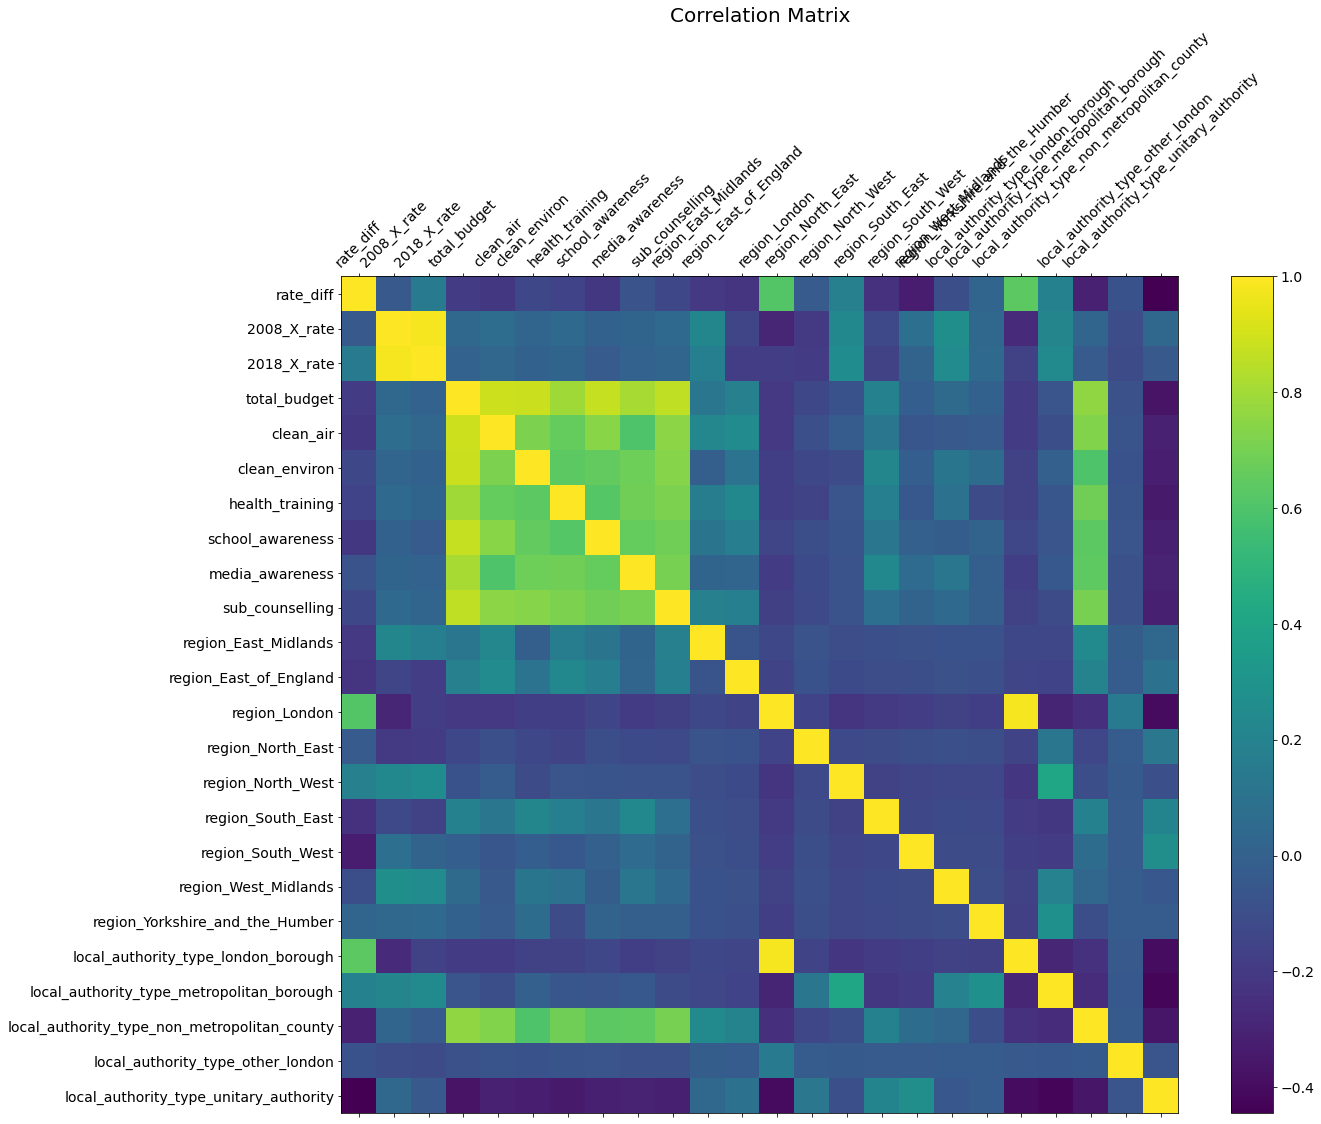

In [36]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df_numeric.corr(), fignum=f.number)
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14, rotation=45)
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=20)


## 4. Dealing with multicollinearity (using VIF) and bulding the model

In [37]:

multi_regression_model_1 = sm.formula.ols('rate_diff ~ total_budget + clean_air + clean_environ + health_training + '
                                          'school_awareness + media_awareness + sub_counselling + region_East_Midlands + '
                                          'region_East_of_England + region_London + region_North_East + region_North_West + '
                                          'region_South_East + region_South_West + region_West_Midlands + '
                                          'region_Yorkshire_and_the_Humber + local_authority_type_london_borough + '
                                          'local_authority_type_metropolitan_borough + local_authority_type_non_metropolitan_county + '
                                          'local_authority_type_other_london + local_authority_type_unitary_authority', df_numeric).fit()
multi_regression_model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rate_diff   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     16.43
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           5.28e-25
Time:                        23:48:35   Log-Likelihood:                 1128.4
No. Observations:                 152   AIC:                            -2221.
Df Residuals:                     134   BIC:                            -2166.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                        0.0002   2.73e-05      7.205      0.000       0.000       0.000
total_budget                                  3.356e-10   1.55e-10      2.169      0.032    2.96e-11    6.42e-10
clean_air                                    -4.457e-10   4.89e-10     -0.912      0.364   -1.41e-09    5.21e-10
clean_environ                                -3.648e-10   4.41e-10     -0.827      0.410   -1.24e-09    5.07e-10
health_training                              -5.372e-10   8.93e-10     -0.602      0.548    -2.3e-09    1.23e-09
school_awareness                             -1.477e-09   4.22e-10     -3.498      0.001   -2.31e-09   -6.42e-10
media_awareness                               2.038e-09    7.3e-10      2.791      0.006    5.94e-10    3.48e-09
sub_counselling                               1.122e-09   1.14e-09      0.986      0.326   -1.13e-09    3.37e-09
region_East_Midlands                         -3.918e-05   5.27e-05     -0.744      0.458      -0.000     6.5e-05
region_East_of_England                       -2.651e-05   4.81e-05     -0.552      0.582      -0.000    6.86e-05
region_London                                    0.0001    4.4e-05      2.852      0.005    3.85e-05       0.000
region_North_East                             6.848e-05   4.29e-05      1.597      0.113   -1.64e-05       0.000
region_North_West                                0.0002   3.52e-05      4.792      0.000    9.91e-05       0.000
region_South_East                            -3.472e-05   3.84e-05     -0.903      0.368      -0.000    4.13e-05
region_South_West                               -0.0001   3.91e-05     -2.970      0.004      -0.000   -3.88e-05
region_West_Midlands                         -3.455e-05   4.14e-05     -0.834      0.406      -0.000    4.74e-05
region_Yorkshire_and_the_Humber               8.488e-05   4.13e-05      2.053      0.042     3.1e-06       0.000
local_authority_type_london_borough              0.0003   5.86e-05      5.600      0.000       0.000       0.000
local_authority_type_metropolitan_borough        0.0001   3.02e-05      4.163      0.000     6.6e-05       0.000
local_authority_type_non_metropolitan_county -5.131e-05   4.68e-05     -1.095      0.275      -0.000    4.13e-05
local_authority_type_other_london               -0.0002   9.93e-05     -2.042      0.043      -0.000   -6.35e-06
local_authority_type_unitary_authority       -3.313e-06   2.35e-05     -0.141      0.888   -4.98e-05    4.31e-05
==============================================================================
Omnibus:                       26.528   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.158
Skew:                

In [38]:
# calculating VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [39]:
df_predictors_selected_VIF = drop_column_using_vif_(df_numeric.drop('rate_diff', axis=1))

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropping: total_budget
Dropping: region_East_Midlands
Dropping: region_London
Dropping: local_authority_type_london_borough
Dropping: 2008_X_rate
Dropping: local_authority_type_metropolitan_borough


In [40]:
df_predictors_selected_VIF.columns

Index(['2018_X_rate', 'clean_air', 'clean_environ', 'health_training',
       'school_awareness', 'media_awareness', 'sub_counselling',
       'region_East_of_England', 'region_North_East', 'region_North_West',
       'region_South_East', 'region_South_West', 'region_West_Midlands',
       'region_Yorkshire_and_the_Humber',
       'local_authority_type_non_metropolitan_county',
       'local_authority_type_other_london',
       'local_authority_type_unitary_authority'],
      dtype='object')

In [41]:
model_df = sm.OLS(endog=df_numeric[['rate_diff']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_df.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rate_diff   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     13.29
Date:                Thu, 11 Nov 2021   Prob (F-statistic):           3.24e-21
Time:                        23:49:29   Log-Likelihood:                 1117.9
No. Observations:                 152   AIC:                            -2200.
Df Residuals:                     134   BIC:                            -2145.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0005   4.91e-05     10.922      0.000       0.000       0.001
2018_X_rate                                      0.0229      0.011      2.055      0.042       0.001       0.045
clean_air                                    -6.248e-10      5e-10     -1.250      0.213   -1.61e-09    3.63e-10
clean_environ                                 2.734e-10    3.9e-10      0.701      0.484   -4.97e-10    1.04e-09
health_training                              -1.045e-09      1e-09     -1.041      0.300   -3.03e-09    9.41e-10
school_awareness                             -1.046e-09   4.06e-10     -2.577      0.011   -1.85e-09   -2.43e-10
media_awareness                               2.817e-09   7.77e-10      3.625      0.000    1.28e-09    4.35e-09
sub_counselling                               1.148e-09   1.31e-09      0.874      0.384   -1.45e-09    3.75e-09
region_East_of_England                          -0.0001   6.54e-05     -2.213      0.029      -0.000   -1.54e-05
region_North_East                               -0.0001   5.77e-05     -2.274      0.025      -0.000   -1.71e-05
region_North_West                            -8.764e-05   4.48e-05     -1.958      0.052      -0.000    8.95e-07
region_South_East                               -0.0002   5.88e-05     -3.298      0.001      -0.000   -7.76e-05
region_South_West                               -0.0003   5.84e-05     -5.105      0.000      -0.000      -0.000
region_West_Midlands                            -0.0003   5.71e-05     -5.121      0.000      -0.000      -0.000
region_Yorkshire_and_the_Humber                 -0.0002   5.27e-05     -3.177      0.002      -0.000   -6.32e-05
local_authority_type_non_metropolitan_county    -0.0003    6.2e-05     -4.521      0.000      -0.000      -0.000
local_authority_type_other_london               -0.0004      0.000     -2.639      0.009      -0.001      -0.000
local_authority_type_unitary_authority          -0.0002   3.95e-05     -5.933      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       26.317   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.670
Skew:                          -0.750   Prob(JB):                     8.15e-13
Kurtosis:                       5.557   Cond. No.                     1.27e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
""

## 5. Residual Analysis

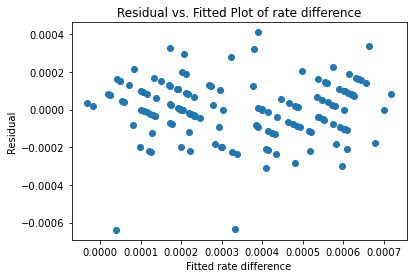

In [42]:
# plot 
plt.scatter(model_df.fittedvalues, model_df.resid)
# adding title and labels
plt.xlabel('Fitted rate difference')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of rate difference')
plt.show()

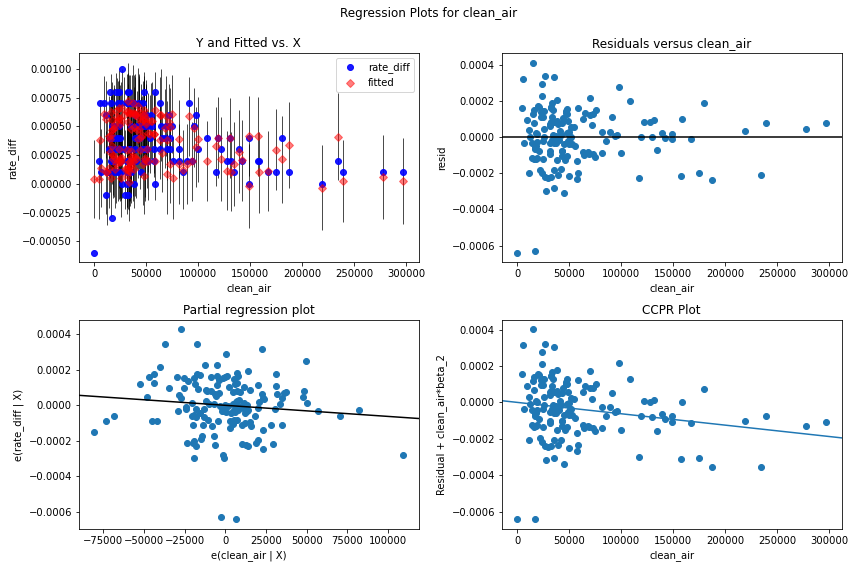

In [44]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_df, 'clean_air', fig=fig)

## 6. Interpreting the model

The R-squared value is 0.628, meaning that 62.8% of the total variance of the bike rental can be explained by the variables used in the model.

## 7. Adjusted R-squared

In [47]:
df_predictors_adding_random = df_predictors_selected_VIF
# using a seed to make the result reproducible
np.random.seed(420)

# adding 'totally_random', which is random noise and shows no relationship with the response variable
df_predictors_adding_random['totally_random'] = np.random.normal(0,5,df_predictors_adding_random.shape[0])
# the model without windspeed
model_df_adding_random = sm.OLS(endog=df_numeric[['rate_diff']], exog=sm.add_constant(df_predictors_adding_random)).fit()
model_df_adding_random.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              rate_diff   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     12.47
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           1.14e-20
Time:                        00:30:29   Log-Likelihood:                 1118.0
No. Observations:                 152   AIC:                            -2198.
Df Residuals:                     133   BIC:                            -2140.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            0.0005   4.95e-05     10.880      0.000       0.000       0.001
2018_X_rate                                      0.0230      0.011      2.054      0.042       0.001       0.045
clean_air                                    -6.357e-10   5.02e-10     -1.265      0.208   -1.63e-09    3.58e-10
clean_environ                                  2.55e-10   3.95e-10      0.646      0.519   -5.26e-10    1.04e-09
health_training                              -1.008e-09   1.01e-09     -0.995      0.322   -3.01e-09    9.97e-10
school_awareness                             -1.036e-09   4.08e-10     -2.538      0.012   -1.84e-09   -2.29e-10
media_awareness                               2.784e-09   7.86e-10      3.544      0.001    1.23e-09    4.34e-09
sub_counselling                               1.231e-09   1.34e-09      0.919      0.360   -1.42e-09    3.88e-09
region_East_of_England                          -0.0001   6.57e-05     -2.209      0.029      -0.000   -1.52e-05
region_North_East                               -0.0001   5.82e-05     -2.291      0.024      -0.000   -1.82e-05
region_North_West                            -9.051e-05   4.57e-05     -1.981      0.050      -0.000   -1.47e-07
region_South_East                               -0.0002   5.91e-05     -3.261      0.001      -0.000   -7.58e-05
region_South_West                               -0.0003   5.87e-05     -5.066      0.000      -0.000      -0.000
region_West_Midlands                            -0.0003   5.73e-05     -5.104      0.000      -0.000      -0.000
region_Yorkshire_and_the_Humber                 -0.0002   5.31e-05     -3.184      0.002      -0.000    -6.4e-05
local_authority_type_non_metropolitan_county    -0.0003   6.34e-05     -4.485      0.000      -0.000      -0.000
local_authority_type_other_london               -0.0004      0.000     -2.562      0.012      -0.001   -9.99e-05
local_authority_type_unitary_authority          -0.0002   3.97e-05     -5.923      0.000      -0.000      -0.000
totally_random                                1.079e-06   3.15e-06      0.343      0.732   -5.14e-06     7.3e-06
==============================================================================
Omnibus:                       25.882   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.856
Skew:                          -0.737   Prob(JB):                     1.23e-12
Kurtosis:                       5.547   Cond. No.                     1.27e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition numbe

## 8. Linear regression without a constant

In [48]:
model_df_no_constant = sm.OLS(endog=df_numeric[['rate_diff']], exog=df_predictors_selected_VIF).fit()
model_df_no_constant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              rate_diff   R-squared (uncentered):                   0.759
Model:                            OLS   Adj. R-squared (uncentered):              0.727
Method:                 Least Squares   F-statistic:                              23.46
Date:                Fri, 12 Nov 2021   Prob (F-statistic):                    7.45e-33
Time:                        00:34:30   Log-Likelihood:                          1069.6
No. Observations:                 152   AIC:                                     -2103.
Df Residuals:                     134   BIC:                                     -2049.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
2018_X_rate                                      0.1090      0.011     10.024      0.000       0.087       0.130
clean_air                                     -5.49e-10   6.88e-10     -0.798      0.426   -1.91e-09    8.12e-10
clean_environ                                 4.736e-10    5.4e-10      0.877      0.382   -5.94e-10    1.54e-09
health_training                               2.086e-10   1.38e-09      0.151      0.880   -2.52e-09    2.94e-09
school_awareness                             -4.187e-10   5.54e-10     -0.756      0.451   -1.51e-09    6.77e-10
media_awareness                               3.362e-09   1.07e-09      3.132      0.002    1.24e-09    5.49e-09
sub_counselling                               1.804e-09   1.83e-09      0.983      0.327   -1.82e-09    5.43e-09
region_East_of_England                       -5.535e-06   8.82e-05     -0.063      0.950      -0.000       0.000
region_North_East                             7.122e-05   7.55e-05      0.944      0.347    -7.8e-05       0.000
region_North_West                            -3.068e-05   6.21e-05     -0.494      0.622      -0.000    9.22e-05
region_South_East                             -7.82e-05   7.96e-05     -0.982      0.328      -0.000    7.92e-05
region_South_West                               -0.0002   7.97e-05     -2.690      0.008      -0.000   -5.67e-05
region_West_Midlands                            -0.0003   7.85e-05     -3.650      0.000      -0.000      -0.000
region_Yorkshire_and_the_Humber              -7.633e-05   7.18e-05     -1.064      0.289      -0.000    6.56e-05
local_authority_type_non_metropolitan_county    -0.0004    8.6e-05     -4.447      0.000      -0.001      -0.000
local_authority_type_other_london            -7.589e-05      0.000     -0.330      0.742      -0.001       0.000
local_authority_type_unitary_authority          -0.0002   5.36e-05     -3.021      0.003      -0.000    -5.6e-05
totally_random                               -1.562e-06    4.3e-06     -0.363      0.717   -1.01e-05    6.94e-06
==============================================================================
Omnibus:                        3.179   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                3.024
Skew:                          -0.345   Prob(JB):                        0.220
Kurtosis:                       2.976   Cond. No.                     9.00e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that th